In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("ecommerce_data_with_return_scores.csv")

In [8]:
df.head()

,user_id,product_id,category,price_rs.,discount_%,final_pricers.,payment_method,purchase_date,purchase_month,purchase_dayofweek,is_returned,return_probability
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-11-12,11,1,0,0.521744
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-02-09,2,4,1,0.438164
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-09-01,9,6,0,0.417935
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,2024-04-01,4,0,0,0.547226
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,2024-09-27,9,4,0,0.539705


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3660 non-null   object 
 1   product_id          3660 non-null   object 
 2   category            3660 non-null   object 
 3   price_rs.           3660 non-null   float64
 4   discount_%          3660 non-null   int64  
 5   final_pricers.      3660 non-null   float64
 6   payment_method      3660 non-null   object 
 7   purchase_date       3660 non-null   object 
 8   purchase_month      3660 non-null   int64  
 9   purchase_dayofweek  3660 non-null   int64  
 10  is_returned         3660 non-null   int64  
 11  return_probability  3660 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 343.3+ KB


In [11]:
df.describe()

,price_rs.,discount_%,final_pricers.,purchase_month,purchase_dayofweek,is_returned,return_probability
count,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579,5.912295,3.003279,0.148907,0.493672
std,141.682621,14.731338,122.687844,3.096907,2.017684,0.356046,0.062995
min,10.090000,0.000000,5.890000,1.000000,0.000000,0.000000,0.284822
25%,134.012500,5.000000,104.512500,3.000000,1.000000,0.000000,0.449321
50%,253.845000,15.000000,199.185000,6.000000,3.000000,0.000000,0.496157
75%,377.595000,25.000000,304.117500,9.000000,5.000000,0.000000,0.536322
max,499.960000,50.000000,496.820000,11.000000,6.000000,1.000000,0.725045


In [12]:
df.describe(include="O")

,user_id,product_id,category,payment_method,purchase_date
count,3660,3660,3660,3660,3660
unique,3660,3660,7,5,326
top,337c166f,f414122f-e,Home & Kitchen,Credit Card,2024-08-21
freq,1,1,549,760,21


In [13]:
# Return rate by category
category_return = df.groupby("category")["is_returned"].mean().sort_values(ascending=False) * 100
print("🔁 Return Rate by Category (%):\n", category_return.round(2))

🔁 Return Rate by Category (%):
 category
Home & Kitchen    17.67
Toys              16.44
Books             16.10
Electronics       15.66
Beauty            14.46
Clothing          12.05
Sports            11.73
Name: is_returned, dtype: float64


In [15]:
 #Return rate by supplier (if column exists)
if "supplier" in df.columns:
    supplier_return = df.groupby("supplier")["is_returned"].mean().sort_values(ascending=False) * 100
    print("\n Return Rate by Supplier (%):\n", supplier_return.round(2))
else:
    print("\n 'supplier' column not found — skipping supplier analysis.")


 'supplier' column not found — skipping supplier analysis.


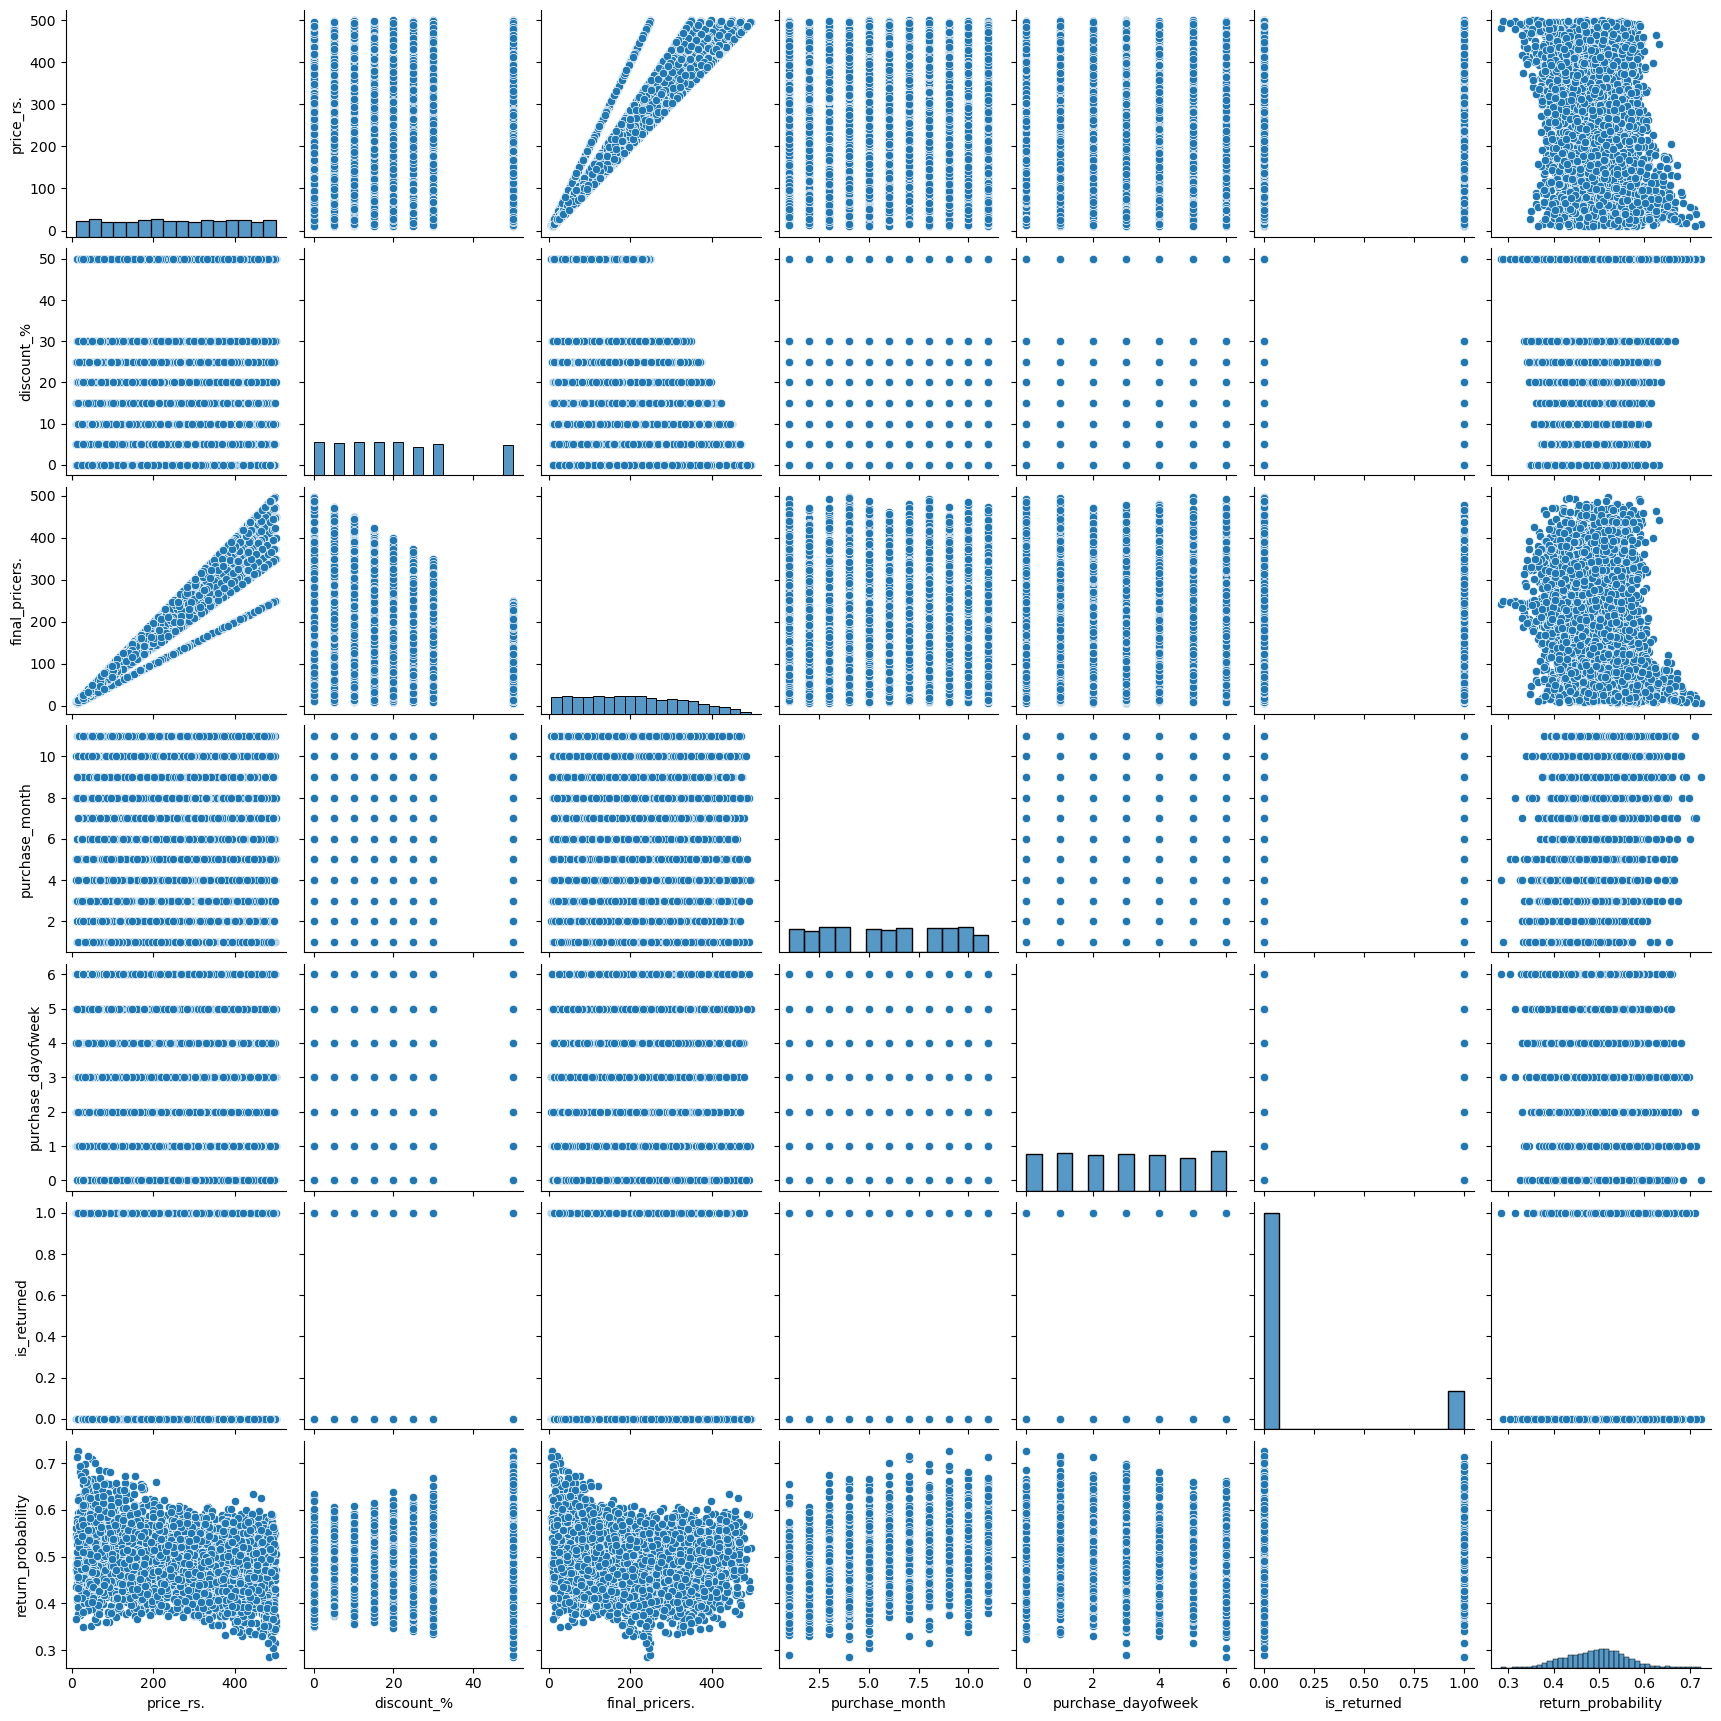

In [18]:
sns.pairplot(df)
plt.show()


In [20]:
# Return rate by discount_%
discount_return = df.groupby("discount_%")["is_returned"].mean().sort_values(ascending=False) * 100
print("🔁 Return Rate by discount_% (%):\n", discount_return.round(2))

🔁 Return Rate by discount_% (%):
 discount_%
25    17.72
50    17.67
5     15.96
20    15.04
10    14.38
15    13.29
0     12.92
30    12.69
Name: is_returned, dtype: float64
